In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [5]:
df=pd.read_csv("covid_toy.csv")
df.sample(5)

,age,gender,fever,cough,city,has_covid
97,20,Female,101.0,Mild,Bangalore,No
58,23,Male,98.0,Strong,Mumbai,Yes
92,82,Female,102.0,Strong,Kolkata,No
79,48,Female,103.0,Mild,Kolkata,Yes
69,73,Female,103.0,Mild,Delhi,No


# EDA

<Axes: xlabel='age', ylabel='fever'>

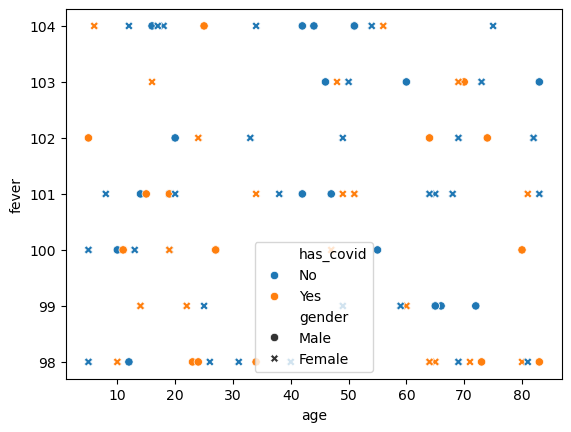

In [12]:
sns.scatterplot(x=df["age"],y=df["fever"],hue=df["has_covid"],style=df["gender"])

# Train Test Split

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test= train_test_split(df.drop(columns=["has_covid"]),df["has_covid"],test_size=0.2)



# Nomral Way (Without Column Transforming)

In [37]:

#Using SimpleImputer to fill misiing values in fever column.
from sklearn.impute import SimpleImputer
si=SimpleImputer()

si.fit(X_train[["fever"]])

X_train_fever=si.transform(X_train[["fever"]])
X_test_fever=si.transform(X_test[["fever"]])


In [51]:

#Applying Ordinal Encoding in cough column
from sklearn.preprocessing import OrdinalEncoder

oe=OrdinalEncoder(categories=[["Mild", "Strong"]],)

oe.fit(X_train[["cough"]])

X_train_cough=oe.transform(X_train[["cough"]])
X_test_cough=oe.transform(X_test[["cough"]])


In [80]:

#Applying OneHotEncoding on gender and city column.
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(drop="first",sparse_output=False)

ohe.fit(X_train[["gender","city"]])

X_train_gender_city= ohe.transform(X_train[["gender","city"]])
X_test_gender_city= ohe.transform(X_test[["gender","city"]])



In [72]:
#getting age value from X_train and X_test
X_train_age=X_train[["age"]].values
X_test_age=X_test[["age"]].values


In [75]:
#Concatenating all values into one array
X_train_transformed=np.concatenate((X_train_age,X_train_gender_city,X_train_cough,X_train_fever),axis=1)
X_test_transformed=np.concatenate((X_test_age,X_test_gender_city,X_test_cough,X_test_fever),axis=1)

# Using Column Transformer

In [97]:
from sklearn.compose import ColumnTransformer
transformer=ColumnTransformer(force_int_remainder_cols=False,transformers=[
    ("tnf1",SimpleImputer(),["fever"]),
    ("tnf2",OrdinalEncoder(categories=[['Mild','Strong']]),["cough"]),
    ("tnf3",OneHotEncoder(sparse_output=False,drop="first"),["gender","city"])
],remainder="passthrough")

transformer.fit(X_train)

new_X_train=transformer.transform(X_train)
new_X_test=transformer.transform(X_test)

